# **Lloyds Banking Group Internship Data Science**

## **📊 Phase 1: Data gathering and exploratory analysis**

### Project brief

- Welcome to the Data Science & Analytics team at Lloyds Banking Group. As a new data science graduate, you have been entrusted with a critical project that could significantly impact our customer retention strategies. Li, our senior data scientist, has specifically chosen you to take over this project due to your strong analytical skills and enthusiasm for solving real-world business problems. This is an exciting opportunity for you to apply your knowledge and make a real impact within our team.
Context

- The project you are about to embark on is the "Customer Retention Enhancement through Predictive Analytics" initiative. This project arose from an urgent need to address declining retention rates within certain segments of our customer base. Over the past few months, **we've noticed a worrying trend of increased customer churn, particularly among young professionals and small business owners.** This poses a substantial threat to our market position and long-term profitability.

- Our fictional client, SmartBank, a subsidiary of Lloyds, has reported that a substantial portion of their customer base is at risk of moving to competitors offering more personalised banking solutions. SmartBank has tasked our team with developing a predictive model to identify at-risk customers and propose targeted interventions to retain them.
Key concepts

### Key Concepts

Before you begin, it's essential to understand a few key concepts:

- Customer churn: The process by which customers stop doing business with a company. Identifying and preventing churn is crucial for maintaining a stable customer base.
    Predictive analytics: Techniques that use historical data to forecast future possibilities. In this project, you'll use predictive analytics to predict which customers are likely to churn.
    Exploratory data analysis (EDA): A method of analysing data sets to summarise their primary characteristics, often using visual strategies. EDA is crucial for understanding the data before building predictive models.
    Machine learning models: Algorithms that let computers learn from and make predictions or decisions based on data. You'll be building a classification model to predict customer churn.

### Project requirements

Your task involves two main phases.

- **`Phase 1: Data gathering and exploratory analysis`**

    - Objective: Collect relevant data, perform exploratory data analysis (EDA), and prepare the data for modelling.
    Steps:
        Identify and gather data from provided sources relevant to predicting customer churn.
        Conduct EDA to understand the data, identify key features, and uncover patterns and insights.
        Clean and preprocess the data to ensure it is ready for model building.
    Deliverable: Submit a report detailing your exploratory data analysis and key findings, including the cleaned and preprocessed data set.

- Phase 2: Building a machine learning model

    - Objective: Develop a predictive model to identify customers at risk of churning and propose ways to measure the model’s performance.
    Steps:
        Choose a suitable machine learning algorithm for the classification task.
        Build and train the model to predict customer churn.
        Suggest ways to evaluate and measure the model’s performance, ensuring its reliability and accuracy.
    Deliverable: Submit a report, including the trained machine learning model and your proposed methods for evaluating and measuring the model’s performance.

The importance of this project

Addressing customer churn is critical for maintaining SmartBank's competitive edge and ensuring long-term sustainability. The board of directors is strongly encouraging the team to deliver a solution promptly, as timely delivery will help secure our market position and capitalize on opportunities. The team is feeling the heat, but they are also highly motivated and determined to turn this challenge into an opportunity. Your role is pivotal in this effort, and your contributions will be closely monitored by senior management.

Embrace this chance to showcase your skills and make a meaningful impact. It’s time to dive in and get to work!

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
from IPython.display import Image

## **Read Dataset**

In [3]:
ds = pd.read_excel('Customer_Churn_Data_Large.xlsx',sheet_name=None)
ds.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [4]:
demographic = ds['Customer_Demographics']
transaction = ds['Transaction_History']
service = ds['Customer_Service']
activity = ds['Online_Activity']
status = ds['Churn_Status']
status['ChurnStatus'] = pd.Categorical(status['ChurnStatus'],[0,1])

In [5]:
demographic.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [6]:
transaction.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [7]:
service.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [8]:
activity.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [9]:
status.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0



## **EDA**

### **1. CustomerID numbers**

Lets look at how many customers are churning **~20%** of the sampled data 

In [10]:
numbers = demographic.merge(status,left_on='CustomerID',right_on='CustomerID',how='left').groupby(['ChurnStatus'])['CustomerID'].describe()['count']
numbers/numbers.sum()

ChurnStatus
0    0.796
1    0.204
Name: count, dtype: float64

### **2. Demographic relation to churn**

From a **demographic** point if view the data tells us that no one feature shows the root causes of churn 

- For **age groups** churned customer variation:
    - The mean churn for each age is evenly distribted 
    - While age group 50-60 has a slightly higher mean of 22% 
    - we look at maximum values 30-40 had an age at which 38.4% churned 
    - The minimum churn values dont differ to much either, all in the region of 5-10%


- **Gender** doesnt seem to be critical either, with churned customers being about 50/50 male and female
- Marital status showes that a slightly higher number of clients who churned were married or widowed (6, 5.4%) as opposed to single and divorced (4.4, 4.6%), which also indicates that there is no clear pattern responsible for churn
- The income group also didnt really add any significant insigh with all three groups sharing about the same distribution of 6.5 - 7.2%

In [11]:
demo_churn = demographic.merge(status,left_on='CustomerID',right_on='CustomerID')

In [12]:
age_churn = demo_churn.groupby(['Age','ChurnStatus']).agg(Counts=('Age','count')).reset_index()
tots = demo_churn.groupby(['Age'],as_index=False).agg(Counts=('Age','count'))
merged = age_churn.merge(tots,left_on='Age',right_on='Age')
merged['Percent'] = ((merged['Counts_x']/merged['Counts_y'])*100).round(2)

In [13]:
merged[merged['ChurnStatus'] == 1]['Counts_x'].sum()/merged['Counts_x'].sum()

np.float64(0.204)

In [47]:
# age bins of customers who churned
merged['Age_bins'] = pd.cut(merged['Age'],[10,20,30,40,50,60,70])
merged['Age_bins'] = merged['Age_bins'].astype('string')
print(merged[merged['ChurnStatus'] == 1].groupby(['Age_bins'])['Percent'].describe().to_markdown(tablefmt='simple'))

Age_bins      count     mean       std    min      25%     50%      75%    max
----------  -------  -------  --------  -----  -------  ------  -------  -----
(10, 20]          3  21.16     3.6861   17.65  19.24    20.83   22.915   25
(20, 30]         10  19.288    7.67809   9.09  12.7075  21.11   23.6275  31.58
(30, 40]         10  18.298   12.0951    0     10.2775  16.325  26.7025  38.46
(40, 50]         10  20.87     8.92221   5.26  15.23    21.11   25.99    33.33
(50, 60]         10  22.324    8.66058  11.11  15.79    22.115  29.2     35
(60, 70]          9  20.4722   9.27481   7.14  14.29    16.67   28.57    33.33


In [46]:
print(merged[merged['ChurnStatus'] == 0].groupby(['Age_bins'])['Percent'].describe().to_markdown(tablefmt='simple'))

Age_bins      count     mean       std    min      25%     50%      75%     max
----------  -------  -------  --------  -----  -------  ------  -------  ------
(10, 20]          3  78.84     3.6861   75     77.085   79.17   80.76     82.35
(20, 30]         10  80.712    7.67809  68.42  76.3725  78.89   87.2925   90.91
(30, 40]         10  81.702   12.0951   61.54  73.2975  83.675  89.7225  100
(40, 50]         10  79.13     8.92221  66.67  74.01    78.89   84.77     94.74
(50, 60]         10  77.676    8.66058  65     70.8     77.885  84.21     88.89
(60, 70]          9  79.5278   9.27481  66.67  71.43    83.33   85.71     92.86


In [39]:
def m(x):
    return print(x.to_markdown(tablefmt='simple'))

In [45]:
gender_churn = demo_churn.groupby(['Gender','ChurnStatus']).agg(counts=('Age','count'))
gender_churn['percentage'] = 100 * gender_churn['counts'] / gender_churn['counts'].sum()
m(gender_churn)

            counts    percentage
--------  --------  ------------
('F', 0)       412          41.2
('F', 1)       101          10.1
('M', 0)       384          38.4
('M', 1)       103          10.3


In [42]:
marital_churn = demo_churn.groupby(['MaritalStatus','ChurnStatus']).agg(counts=('Age','count')) 
marital_churn['percentage'] = 100 * marital_churn['counts'] / marital_churn['counts'].sum()
m(marital_churn)

                   counts    percentage
---------------  --------  ------------
('Divorced', 0)       202          20.2
('Divorced', 1)        46           4.6
('Married', 0)        201          20.1
('Married', 1)         60           6
('Single', 0)         171          17.1
('Single', 1)          44           4.4
('Widowed', 0)        222          22.2
('Widowed', 1)         54           5.4


In [43]:
income_churn = demo_churn.groupby(['IncomeLevel','ChurnStatus']).agg(counts=('Age','count'))
income_churn['percentage'] = 100 * income_churn['counts'] / income_churn['counts'].sum()
m(income_churn)

                 counts    percentage
-------------  --------  ------------
('High', 0)         282          28.2
('High', 1)          67           6.7
('Low', 0)          253          25.3
('Low', 1)           72           7.2
('Medium', 0)       261          26.1
('Medium', 1)        65           6.5


### **3. User transaction relation to churn**

For **transactional** data, we have more features to differentiate both groups

- Whilst there is no difference in the **number of purchases** of each group
- We start to see some clear variation in spending in various **ProductCategory**; especially evident in statistics of grocery purchases. 
- The mean purchases of customers who churned is much higher (mean,25% & 50% subsets)

<br>

```markdown
	                count	mean	std	min	25%	50%	75%	max
Groceries	0	820.0	251.88	145.05	5.20	126.24	249.44	381.39	499.57
                1	200.0	272.95	138.11	5.92	161.76	277.58	389.38	494.90
```

**Historical transaction** data:

- Average/Mean spending across all categories is about the same over time
- Maximum spending of churned customers is noticably less than those who didn't churn, especially in the **last 6 months**
- For **groceries**, historical data also confirms that churned customers tend to spend much more on groceries, on multiple occasions, the difference between these two groups is very significant (**1.5 - 2 times**)

In [20]:
# average number of transactions
transaction_churn = transaction.groupby(['CustomerID'],as_index=False).agg(Counts=('TransactionID','count')).merge(status,left_on='CustomerID',right_on='CustomerID')
transaction_churn['Active'] = transaction_churn['Counts'].apply(lambda x: x > 0)
transaction_churn.groupby(['ChurnStatus'])['Counts'].median()

ChurnStatus
0    5.0
1    5.0
Name: Counts, dtype: float64

In [21]:
# average transaction by user
transaction_data = transaction.merge(status,left_on='CustomerID',right_on='CustomerID')

Lets check how each groups tends to spend on different **product categories** 

In [38]:
trx_churn_prods_vals = transaction_data.groupby(['ProductCategory','ChurnStatus'])['AmountSpent'].describe().round(2)
print(trx_churn_prods_vals.to_markdown(tablefmt='simple'))

                      count    mean     std    min     25%     50%     75%     max
------------------  -------  ------  ------  -----  ------  ------  ------  ------
('Books', 0)            844  248.96  141.55   5.18  127.01  248.5   365.49  495.85
('Books', 1)            197  250.99  146.68   6.26  118.64  260.79  381.84  499.86
('Clothing', 0)         813  253     142.76   5.76  129.07  256.79  372.13  499.06
('Clothing', 1)         187  250.05  153.31   5.65  110.12  238.97  393.88  496.88
('Electronics', 0)      776  248.27  139.61   5.53  129.58  244.38  366.77  498.03
('Electronics', 1)      225  251.02  140.06   6.3   125.88  255.14  371.73  490.6
('Furniture', 0)        779  247.99  140.56   6.79  129.37  243.71  365.36  499.7
('Furniture', 1)        213  242.27  140.58   5.86  119.98  224.83  366.66  499.51
('Groceries', 0)        820  251.88  145.05   5.2   126.24  249.44  381.39  499.57
('Groceries', 1)        200  272.95  138.11   5.92  161.76  277.58  389.38  494.9


In [23]:
churn_trans_average_all = transaction_data.set_index('TransactionDate').groupby('ChurnStatus').resample('7d')['AmountSpent'].mean().reset_index()
churn_trans_average_max = transaction_data.set_index('TransactionDate').groupby('ChurnStatus').resample('7d')['AmountSpent'].max().reset_index()
churn_trans_average_groc = transaction_data[transaction_data['ProductCategory'] == 'Groceries'].set_index('TransactionDate').groupby('ChurnStatus').resample('7d')['AmountSpent'].mean().reset_index()

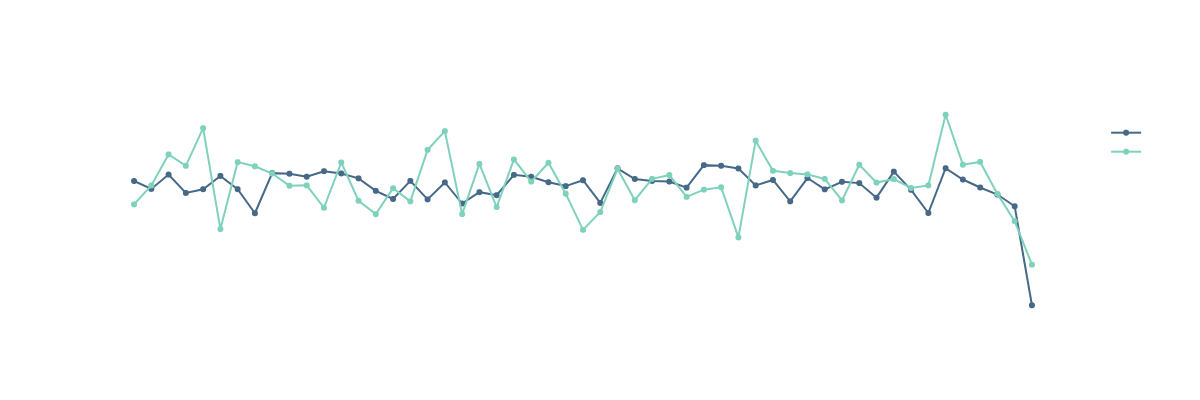

In [34]:
fig = px.line(churn_trans_average_all,
        x='TransactionDate',
        y='AmountSpent',
        color='ChurnStatus',
        markers=True,
        template='plotly_white',
        title='All category average spending',
        color_discrete_sequence=["#456987", "#7ed2bc"]
        )

# Update layout for transparent background and white fonts
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent outer background[2][3][8]
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plotting area background[2][3][8]
    title_font=dict(color='white'),  # White plot title
    xaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),
    yaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),

    legend=dict(
        font=dict(color='white'),  # White legend text
        bgcolor='rgba(0,0,0,0)'   # Transparent legend background
    ),
    title=dict(
        text="All category average spending",
        font=dict(
            color='white',
            size=20,
            family='Courier New, monospace'  # Use a bold font family
        )
    )
)

# Update x and y axes for white lines, ticks, labels, and 20% opacity grid
fig.update_xaxes(
    showline=True,         # Show axis line
    linecolor='white',     # White axis line
    tickfont=dict(color='white'),  # White tick labels
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)
fig.update_yaxes(
    showline=True,
    linecolor='white',
    tickfont=dict(color='white'),
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)

fig.show('png',width=1200,height=400)

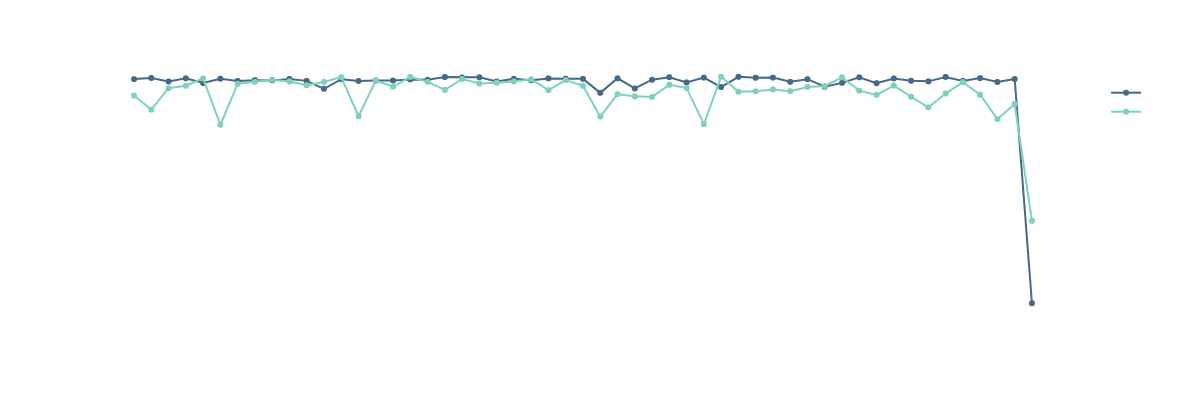

In [33]:
fig = px.line(churn_trans_average_max,
        x='TransactionDate',
        y='AmountSpent',
        color='ChurnStatus',
        markers=True,
        template='plotly_white',
        color_discrete_sequence=["#456987", "#7ed2bc"]
)

# Update layout for transparent background and white fonts
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent outer background[2][3][8]
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plotting area background[2][3][8]
    title_font=dict(color='white'),  # White plot title
    xaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),
    yaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),

    legend=dict(
        font=dict(color='white'),  # White legend text
        bgcolor='rgba(0,0,0,0)'   # Transparent legend background
    ),
    title=dict(
        text="Maximum spending for purchases",
        font=dict(
            color='white',
            size=20,
            family='Courier New, monospace'  # Use a bold font family
        )
    )
)

# Update x and y axes for white lines, ticks, labels, and 20% opacity grid
fig.update_xaxes(
    showline=True,         # Show axis line
    linecolor='white',     # White axis line
    tickfont=dict(color='white'),  # White tick labels
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)
fig.update_yaxes(
    showline=True,
    linecolor='white',
    tickfont=dict(color='white'),
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)


fig.show('png',width=1200,height=400)


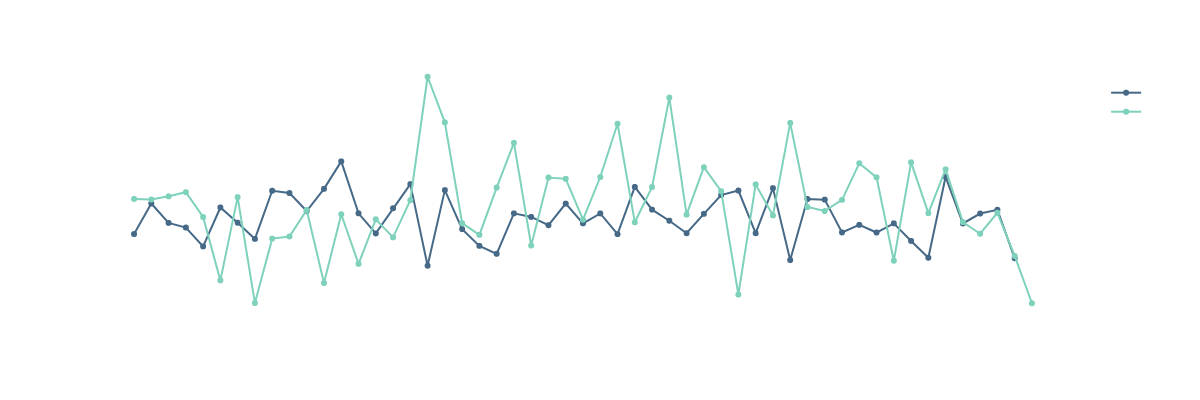

In [31]:
fig = px.line(churn_trans_average_groc,
        x='TransactionDate',
        y='AmountSpent',
        color='ChurnStatus',
        template='plotly_white',
        color_discrete_sequence=["#456987", "#7ed2bc"],
        markers=True)

# Update layout for transparent background and white fonts
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent outer background[2][3][8]
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plotting area background[2][3][8]
    title_font=dict(color='white'),  # White plot title
    xaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),
    yaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),

    legend=dict(
        font=dict(color='white'),  # White legend text
        bgcolor='rgba(0,0,0,0)'   # Transparent legend background
    ),
    title=dict(
        text="Groceries average spending",
        font=dict(
            color='white',
            size=20,
            family='Courier New, monospace'  # Use a bold font family
        )
    )
)

# Update x and y axes for white lines, ticks, labels, and 20% opacity grid
fig.update_xaxes(
    showline=True,         # Show axis line
    linecolor='white',     # White axis line
    tickfont=dict(color='white'),  # White tick labels
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)
fig.update_yaxes(
    showline=True,
    linecolor='white',
    tickfont=dict(color='white'),
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)


fig.show('png',width=1200,height=400)

### **4. Service relation to churn**

We also have information about the customer interaction with the banks' **customer service department**

- On first impression, bad customer service and unresolved issues of customer users can be a reason why a customer churned
- As with other data, variation between both groups is quite minimal, however:

    - **complaints** and **Inquiries**, churned customers had a smaller resolved percentage, as opposed to non churned customers


In [49]:
service_churn = service.merge(status,left_on='CustomerID',right_on='CustomerID',how='left')

# resolved / unresolved statistics for both groups
serv_churn = service_churn.groupby(['InteractionType','ResolutionStatus','ChurnStatus'])['CustomerID'].count().reset_index()
serv_churn_stats = pd.pivot(serv_churn,index=['ChurnStatus','InteractionType'],columns='ResolutionStatus',values='CustomerID')
serv_churn_stats['Total'] = serv_churn_stats['Resolved'] + serv_churn_stats['Unresolved']
serv_churn_stats['Resolved/Total'] = ((serv_churn_stats['Resolved']/serv_churn_stats['Total'])*100).round(2)
print(serv_churn_stats.to_markdown(tablefmt='simple'))

                    Resolved    Unresolved    Total    Resolved/Total
----------------  ----------  ------------  -------  ----------------
(0, 'Complaint')         124           139      263             47.15
(0, 'Feedback')          155           129      284             54.58
(0, 'Inquiry')           137           112      249             55.02
(1, 'Complaint')          32            40       72             44.44
(1, 'Feedback')           44            32       76             57.89
(1, 'Inquiry')            31            27       58             53.45


### **5. Activity relation to churn**

The last group of data is related to the user's **online activity**

- For churned users, percentage tended to increase for users who utilised **Mobile App** (21%) more than **Online Banking** (18.22%) and **Website** (16.55%) for users who churned
- For Non churned users, the usage tended to be quite even for all three groups (79 - 83%)
- If we look at the **timeline**

    - Up to October 2023, churned and non churned users tended to have similar activity
    - Activity of churned users after October 2023 tended to reduce quite a bit compared to non churned users

In [50]:
# general activity statistics & relation to churn
activity_churn = activity.merge(status,left_on='CustomerID',right_on='CustomerID',how='left')

total_activity = activity_churn.groupby(['ServiceUsage'])['LoginFrequency'].sum()
activity_churn_stat = activity_churn[['ServiceUsage','ChurnStatus','LoginFrequency']].groupby(['ServiceUsage','ChurnStatus']).sum()
activity_churn_stat_merge = activity_churn_stat.reset_index().merge(total_activity,left_on='ServiceUsage',right_on='ServiceUsage')
activity_churn_stat_merge['serviceusage_ratio'] = ((activity_churn_stat_merge['LoginFrequency_x']/activity_churn_stat_merge['LoginFrequency_y'])*100).round(2)
print(activity_churn_stat_merge.to_markdown(tablefmt='simple'))

    ServiceUsage      ChurnStatus    LoginFrequency_x    LoginFrequency_y    serviceusage_ratio
--  --------------  -------------  ------------------  ------------------  --------------------
 0  Mobile App                  0                6768                8565                 79.02
 1  Mobile App                  1                1797                8565                 20.98
 2  Online Banking              0                7667                9375                 81.78
 3  Online Banking              1                1708                9375                 18.22
 4  Website                     0                6653                7972                 83.45
 5  Website                     1                1319                7972                 16.55


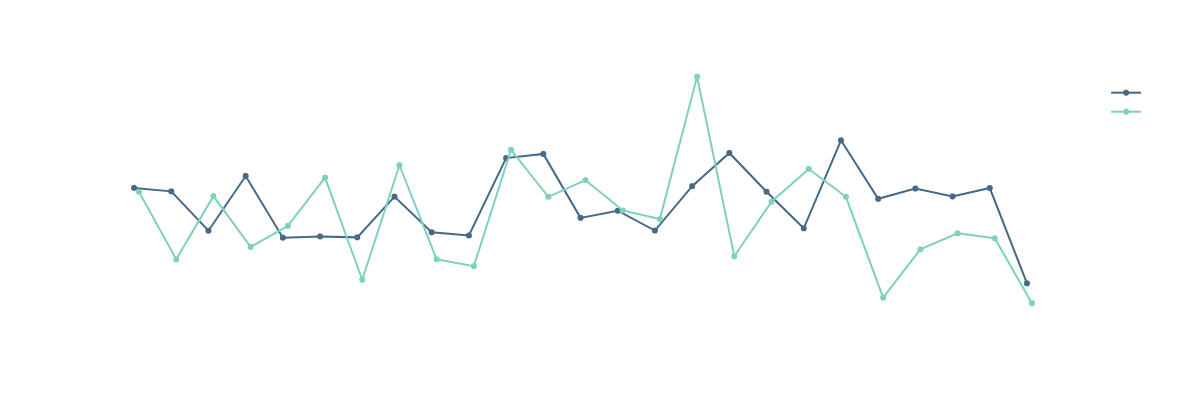

In [32]:
activity_churn_stat = activity_churn.set_index('LastLoginDate').groupby(['ChurnStatus']).resample('15d')['LoginFrequency'].sum().reset_index()
activity_churn_stat = activity_churn_stat.merge(numbers,left_on='ChurnStatus',right_on='ChurnStatus')
activity_churn_stat['norm_LoginFrequency'] = (activity_churn_stat['LoginFrequency']/activity_churn_stat['count'])*100
activity_churn_stat['LastLoginDate'] = pd.Categorical(activity_churn_stat['LastLoginDate'])

fig = px.line(activity_churn_stat,
             x='LastLoginDate',
             y='norm_LoginFrequency',
             color='ChurnStatus',
             template='plotly_white',
             color_discrete_sequence=["#456987", "#7ed2bc"],
             markers=True)

# Update layout for transparent background and white fonts
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent outer background[2][3][8]
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plotting area background[2][3][8]
    title_font=dict(color='white'),  # White plot title
    xaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),
    yaxis_title_font=dict(family="Arial Black, Arial, sans-serif", size=16, color="white"),

    legend=dict(
        font=dict(color='white'),  # White legend text
        bgcolor='rgba(0,0,0,0)'   # Transparent legend background
    ),
    title=dict(
        text="Online activity per user",
        font=dict(
            color='white',
            size=20,
            family='Courier New, monospace'  # Use a bold font family
        )
    )
)

# Update x and y axes for white lines, ticks, labels, and 20% opacity grid
fig.update_xaxes(
    showline=True,         # Show axis line
    linecolor='white',     # White axis line
    tickfont=dict(color='white'),  # White tick labels
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)
fig.update_yaxes(
    showline=True,
    linecolor='white',
    tickfont=dict(color='white'),
    gridcolor='rgba(255,255,255,0.1)',  # White grid lines with 20% opacity
    linewidth=2
)


fig.show('png',width=1200,height=400)


<div style="background-color: #25323b; padding: 20px; border-radius: 10px; border-left: 5px solid #3498db; margin-bottom: 20px;">

<h3 style="color: #e1f0fa; margin-top: 0;">📊 EDA | Summary</h3>

<p><b>Lets review what we learned from this segment</b></p>

<ul>
<li><b>20.4%</b> of customers churned, which is significant and should be investigated</li>
<li><b>Demographic</b> feature relation to churn is very minimal, but still useful for </li>
<li>The <b>number of purchases</b> of customers is not a factor for churn</li>
<li><b>Purchase history</b> data for <b>groceries</b> and other subsets was found to be a feature to differentiate churned customers</li> 
<li><b>Service interaction</b> data didn't reveal a major variation between groups, however unresolved inquiries and complaints were higher for churned customers</li>
<li><b>Online activity</b> data indicated that churned customers were slightly less active in the last couple of months</li>
</ul>

<p>Not all data sources available to us showed meaningful data related to customer churn, however it should be noted that we can't rule out any source of data without constructing our model pipeline and evaluating some model metrics</p> 


</div>
